In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
ratings= pd.read_csv('./ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
ratings.shape

(100836, 4)

In [5]:
tags=pd.read_csv('./ml-latest-small/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [6]:
tags.shape

(3683, 4)

In [7]:
movies=pd.read_csv('./ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
movies.shape

(9742, 3)

Formulate one or two ideas on how the combination of ratings and tags by
users helps the data set to establish additional value using exploratory data
analysis

Build one or more clustering models to determine similar movies to
recommend using the other ratings and tags of movies by other users as
features

## Exploratory Data Analysis

In order to combine tags and ratings, it's a good to see the statistics of these two dataframes

In [9]:
tags.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


In [10]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [11]:
merge_tags_ratings=pd.merge(ratings,tags,on=['userId','movieId'])
merge_tags_ratings.drop(columns=['timestamp_x','timestamp_y'],axis=1,inplace=True)
merge_tags_ratings.sample(5)

,userId,movieId,rating,tag
215,62,68848,4.0,con artists
2860,567,6291,3.0,melancholy
2355,477,750,5.0,dark comedy
2385,477,1219,4.0,Alfred Hitchcock
2909,567,26717,0.5,psychedelic


## Tags vs ratings

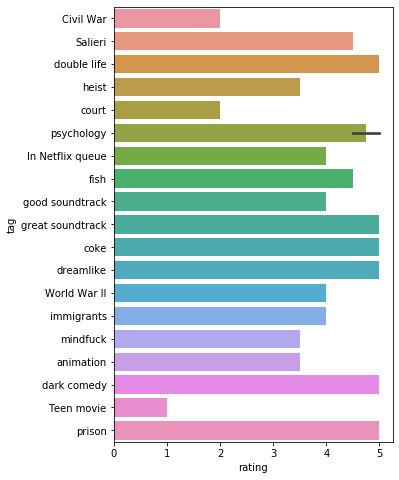

In [12]:
# Taking some tags and plotting the ratings received for them
plt.figure(figsize=(5,8))
#Tags=merge_tags_ratings[merge_tags_ratings['tag']=='Black comedy']
ax= sns.barplot(x="rating",y='tag',data=merge_tags_ratings.sample(20))
plt.show()

We can see ratings based on tag, but this doesn't give you the big picture. For each tag there are multiple ratings possible , this can be analyzed by taking any one or two tags and analyzing it

In [13]:
#taking dark comedy as a sample tag
merge_tags_ratings[merge_tags_ratings.tag=='dark comedy'].rating.describe()

count    20.000000
mean      4.450000
std       0.626183
min       3.000000
25%       4.000000
50%       4.500000
75%       5.000000
max       5.000000
Name: rating, dtype: float64

We can see that <b>dark comedy</b> tag has 20  ratings in total and average rating is 4.45 and min rating is 3, but visualizing it we can see the max rating which is 5

In [14]:
dc= merge_tags_ratings.groupby('tag')
dark_comedy=dc.get_group('dark comedy')

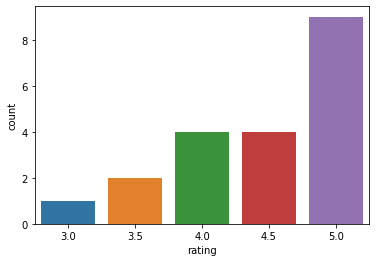

In [15]:
# we can see number of 5.0 ratings for dark comedy are high than the rest of the ratings
sns.countplot(x=dark_comedy['rating'])

## Combining tags,ratings and movies

In [29]:
#combining movies and ratings to perform some EDA
df_movies_ratings=pd.merge(movies,ratings,on=['movieId'],how='right')
df_movies_ratings.drop_duplicates(subset=['title'],keep='first',inplace=True)
df_movies_ratings.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
215,2,Jumanji (1995),Adventure|Children|Fantasy,6,4.0,845553522
325,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,964981247
377,4,Waiting to Exhale (1995),Comedy|Drama|Romance,6,3.0,845554349
384,5,Father of the Bride Part II (1995),Comedy,6,5.0,845553938


In [30]:
df_movies_ratings.shape

(9719, 6)

In [31]:
df_movies_ratings.sort_values(by=['movieId','rating'],inplace=True)
df_movies_ratings.reset_index(inplace=True)
#df_movies_ratings.head()

In [32]:
df_movies_ratings.drop('index',axis=1,inplace=True)
df_movies_ratings.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,2,Jumanji (1995),Adventure|Children|Fantasy,6,4.0,845553522
2,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,964981247
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,6,3.0,845554349
4,5,Father of the Bride Part II (1995),Comedy,6,5.0,845553938


In [33]:
df_movies_ratings.shape

(9719, 6)

### Average rating for each movie

It is evident from above dataframe that there are different ratinngs possible just like how different ratings were possible for tags, So let's compute the average rating for the movie which will be displayed on website

In [34]:
average_movie_rating=df_movies_ratings.groupby(['title','movieId'])['rating'].mean().reset_index()
average_movie_rating.rename(index=str,columns={"rating":"average_rating"},inplace=True)
average_movie_rating.head()

,title,movieId,average_rating
0,'71 (2014),117867,4.0
1,'Hellboy': The Seeds of Creation (2004),97757,4.0
2,'Round Midnight (1986),26564,3.5
3,'Salem's Lot (2004),27751,5.0
4,'Til There Was You (1997),779,3.0


In [58]:
#title_year[1].dtype=="str"

In [35]:
#splitting the title and year column to get more accurate data
title_year=average_movie_rating['title'].str.rsplit("(",1,expand=True)
average_movie_rating['title']=title_year[0]
average_movie_rating['Year']=title_year[1]
average_movie_rating['Year']=average_movie_rating['Year'].astype(str)
average_movie_rating['Year']=average_movie_rating['Year'].apply(lambda s:s.strip(')'))
average_movie_rating.head()

,title,movieId,average_rating,Year
0,'71,117867,4.0,2014
1,'Hellboy': The Seeds of Creation,97757,4.0,2004
2,'Round Midnight,26564,3.5,1986
3,'Salem's Lot,27751,5.0,2004
4,'Til There Was You,779,3.0,1997


In [36]:
average_movie_rating.shape

(9719, 4)

In [37]:
#merging the average rating with df_movies_ratings
df_movies_ratings=pd.merge(df_movies_ratings,average_movie_rating,on=['movieId'])
df_movies_ratings.drop('title_x',axis=1,inplace=True)
df_movies_ratings.rename(index=str,columns={"title_y":"Title"},inplace=True)
df_movies_ratings.head()

,movieId,genres,userId,rating,timestamp,Title,average_rating,Year
0,1,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,Toy Story,4.0,1995
1,2,Adventure|Children|Fantasy,6,4.0,845553522,Jumanji,4.0,1995
2,3,Comedy|Romance,1,4.0,964981247,Grumpier Old Men,4.0,1995
3,4,Comedy|Drama|Romance,6,3.0,845554349,Waiting to Exhale,3.0,1995
4,5,Comedy,6,5.0,845553938,Father of the Bride Part II,5.0,1995


In [38]:
df_movies_ratings.shape

(9719, 8)

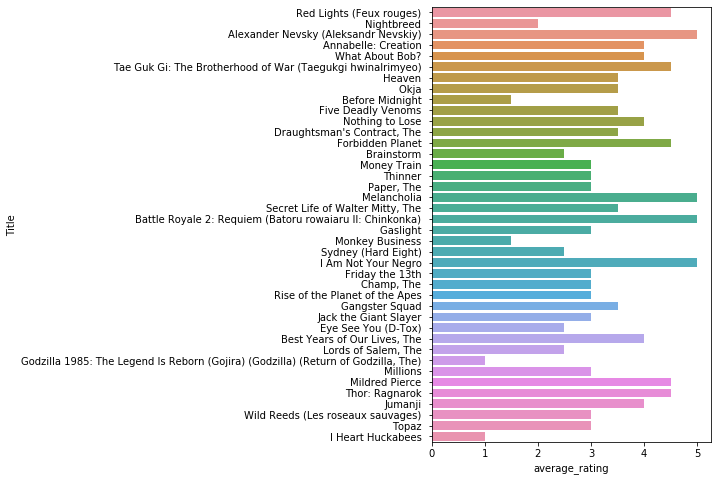

In [39]:
#plotting average_rating vs movie for some samples
plt.figure(figsize=(5,8))
ax=sns.barplot(x='average_rating',y='Title',data=df_movies_ratings.sample(40))
plt.show()

In [53]:
#combining movies and tags
movies_tags=pd.merge(movies,tags,on=['movieId'],how='left')
#movies_tags.head()

In [55]:
movies_tags.drop(columns=['genres','userId','timestamp'],axis=1,inplace=True)
movies_tags.drop_duplicates(subset=['title','tag'],inplace=True)
movies_tags.head()

,movieId,title,tag
0,1,Toy Story (1995),pixar
2,1,Toy Story (1995),fun
3,2,Jumanji (1995),fantasy
4,2,Jumanji (1995),magic board game
5,2,Jumanji (1995),Robin Williams


In [56]:
movies_tags.shape

(11746, 3)

### No of Tags for each movie

In [61]:
tag_count=movies_tags.groupby(['title'])['tag'].nunique().sort_values(ascending=False).to_frame()
tag_count['title']=tag_count.index.tolist()
tag_count.columns=['Tag_Count','Title']
tag_count.reset_index(inplace=True)
tag_count.drop(columns=['Title'],inplace=True)
tag_count.head()

,title,Tag_Count
0,Pulp Fiction (1994),173
1,Fight Club (1999),48
2,2001: A Space Odyssey (1968),40
3,"Big Lebowski, The (1998)",32
4,Léon: The Professional (a.k.a. The Professiona...,32


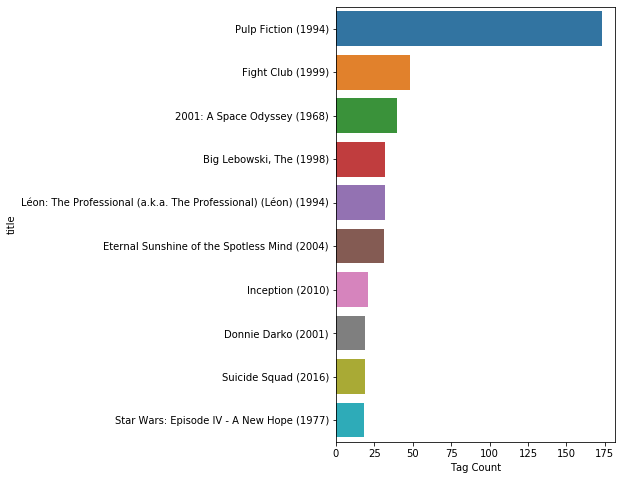

In [66]:
plt.figure(figsize=(5,8))
ax=sns.barplot(x='Tag_Count',y='title',data=tag_count.head(10))
ax.set(xlabel='Tag Count')
plt.show()

In [81]:
#Merging data sets rating, movies and tags on "moviedId"
df_movie_tags_ratings=pd.merge(df_movies_ratings,movies_tags,on='movieId')
#df_movie_tags_ratings.drop(columns=['rating','timestamp','title'],inplace=True)
df_movie_tags_ratings.head()

,movieId,genres,userId,Title,average_rating,Year,tag
0,1,Adventure|Animation|Children|Comedy|Fantasy,1,Toy Story,4.0,1995,pixar
1,1,Adventure|Animation|Children|Comedy|Fantasy,1,Toy Story,4.0,1995,fun
2,2,Adventure|Children|Fantasy,6,Jumanji,4.0,1995,fantasy
3,2,Adventure|Children|Fantasy,6,Jumanji,4.0,1995,magic board game
4,2,Adventure|Children|Fantasy,6,Jumanji,4.0,1995,Robin Williams


In [80]:
df_movie_tags_ratings.shape

(11723, 10)

### Feature engineering

From the above dataframe, we will apply Label encoding on tag and we will count of genres for each movie.Basicaly we are transforming the textual data to numerical as part of Feature Transformation

In [85]:
list1=len(df_movie_tags_ratings['genres'][0].split('|'))
list1

5

In [88]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df_movie_tags_ratings['tag'] = label.fit_transform(df_movie_tags_ratings['tag'].astype('str'))
df_movie_tags_ratings['Genres']=df_movie_tags_ratings['genres'].apply(lambda s:len(s.split('|')))
df_movie_tags_ratings.head()

,movieId,genres,userId,Title,average_rating,Year,tag,Genres
0,1,Adventure|Animation|Children|Comedy|Fantasy,1,Toy Story,4.0,1995,776,5
1,1,Adventure|Animation|Children|Comedy|Fantasy,1,Toy Story,4.0,1995,568,5
2,2,Adventure|Children|Fantasy,6,Jumanji,4.0,1995,526,3
3,2,Adventure|Children|Fantasy,6,Jumanji,4.0,1995,313,3
4,2,Adventure|Children|Fantasy,6,Jumanji,4.0,1995,1549,3


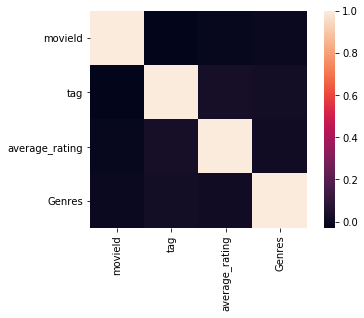

In [92]:
#checking correlation between features
df1_movie_tags_ratings=df_movie_tags_ratings[['movieId','tag','average_rating','Genres']] #taking the useful features
corr=df1_movie_tags_ratings.corr()
sns.heatmap(corr,square=True)

The color palette in the side represents the amount of correlation among the variables.
The lighter shade represents high correlation.
We can see average_rating and tag are most correalted.
We also observe that movieId is not least correlated with any other feature

## Clustering the data

In [166]:
#storig the features in "S"
#X= scale(df1_movie_tags_ratings[['tag','average_rating']])
S= df1_movie_tags_ratings[['tag','average_rating']].values
S[0:10]

array([[ 776.,    4.],
       [ 568.,    4.],
       [ 526.,    4.],
       [ 313.,    4.],
       [1549.,    4.],
       [ 575.,    4.],
       [ 667.,    4.],
       [ 741.,    4.],
       [ 696.,    3.],
       [ 805.,    5.]])

In order to determine no of clusters, we need to calculate the loss function<br>
Loss function is basically taking the no of clusters and with in each cluster, we determine the squared distance from each data point in the cluster and sum it across all clusters <br>
If the loss is minimum at some "<b>K</b>" , it means the intracluster distance is small and we can select this number of clusters

In [167]:
from sklearn.cluster import KMeans

In [168]:
squared_distance=[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(S)
    squared_distance.append(kmeans.inertia_)

Text(0, 0.5, 'Squared_Distance')

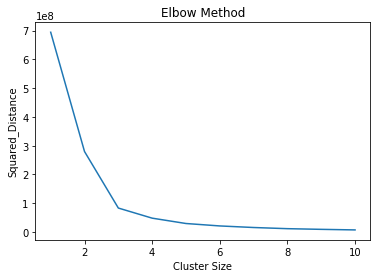

In [169]:
plt.plot(range(1,11),squared_distance)
plt.title("Elbow Method")
plt.xlabel("Cluster Size")
plt.ylabel('Squared_Distance')

Taking the no of clusters as 5 , as change is minimum from 5 to 6

In [170]:
clustering= KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
Y= clustering.fit_predict(S)

In [171]:
Y

array([1, 1, 3, ..., 1, 1, 1])

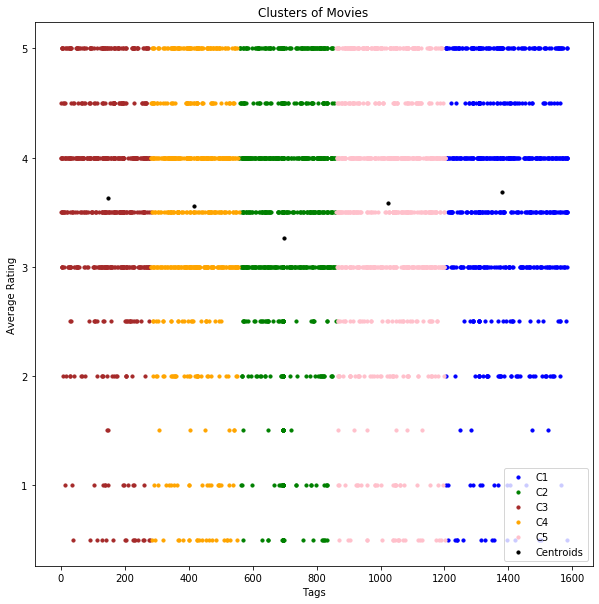

In [173]:
#color_theme=np.array(['blue','green','brown','orange','pink'])
#labels=np.array(['C1','C2','C3','C4','C5'])
plt.figure(figsize=(10,10))
plt.scatter(S[Y == 0, 0], S[Y == 0,1],s = 10, c='blue', label = 'C1')

plt.scatter(S[Y == 1, 0], S[Y == 1,1],s = 10, c='green', label = 'C2')

plt.scatter(S[Y == 2, 0], S[Y == 2,1],s = 10, c='brown', label = 'C3')

plt.scatter(S[Y == 3, 0], S[Y == 3,1],s = 10, c='orange', label = 'C4')

plt.scatter(S[Y == 4, 0], S[Y == 4,1],s = 10, c='pink', label = 'C5')
plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s = 10, c = 'black', label = 'Centroids')
plt.title('Clusters of Movies')
plt.xlabel('Tags')
plt.ylabel('Average Rating')
plt.legend()
plt.show()

### Recommending a Movie from Cluster

In order to recommend a movie, we first have to see what movies are present in cluster

In [144]:
movie_title=[] #we store movie title in this list
for index,row in df_movie_tags_ratings.iterrows():
    movie_title.append(row['Title'])

In [174]:
# Next step is to find the clusters
labels=clustering.predict(S)
clusters={}
n=0
for item in labels:
    if item in clusters:
        if(movie_title[n] not in clusters[item]):
            clusters[item].append(movie_title[n])
    else:
        clusters[item] = [movie_title[n]]
    n +=1

#sort the dictionary    
import collections
clusters = collections.OrderedDict(sorted(clusters.items()))

In [175]:
#print the clusters for 10 movies each
for item in clusters:
    print ("Cluster ", item + 1)
    n = 1
    for i in clusters[item]:
            print (i)
            n += 1
            if(n > 10):
                print("\n")
                break

Cluster  1
Jumanji 
Casino 
Sense and Sensibility 
Get Shorty 
Persuasion 
City of Lost Children, The (Cité des enfants perdus, La) 
Twelve Monkeys (a.k.a. 12 Monkeys) 
Babe 
Dead Man Walking 
Clueless 


Cluster  2
Toy Story 
Jumanji 
Grumpier Old Men 
Waiting to Exhale 
Father of the Bride Part II 
Heat 
Tom and Huck 
Sudden Death 
GoldenEye 
American President, The 


Cluster  3
Leaving Las Vegas 
Othello 
Cry, the Beloved Country 
Richard III 
Mighty Aphrodite 
Braveheart 
Taxi Driver 
Basketball Diaries, The 
Dolores Claiborne 
Forget Paris 


Cluster  4
Jumanji 
Twelve Monkeys (a.k.a. 12 Monkeys) 
Dead Man Walking 
Clueless 
Bottle Rocket 
Braveheart 
Boomerang 
Kids 
Net, The 
Clerks 


Cluster  5
Father of the Bride Part II 
Sabrina 
Copycat 
Dangerous Minds 
Twelve Monkeys (a.k.a. 12 Monkeys) 
Babe 
It Takes Two 
Clueless 
How to Make an American Quilt 
Seven (a.k.a. Se7en) 




## Conclusion

Above clusters show that there are some overlapping of movies in each cluster.In order to recommend a movie, we find the cluster of given movie and recommend some movies from the cluster. Accurate recommednation is not guaranteed as clusters are overlapping